In [1]:
import numpy as np  

# Définir la matrice normale
A = np.array([[4, 5],  
              [6, 7],  
              [8, 0]])   

# Étape 1 : Centrer et réduire la matrice
# Centrage
A_centered = A - np.mean(A, axis=0)

# Réduction (normalisation par l'écart type)
A_standardized = A_centered / np.std(A_centered, axis=0)

# Étape 2 : Calculer la matrice de corrélation
corr_matrix = np.corrcoef(A_standardized, rowvar=False)

# Étape 3 : Calculer les valeurs propres et les vecteurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(corr_matrix)

# Afficher les résultats
print("Matrice de Corrélation :")
print(corr_matrix)

print("\nValeurs Propres :")
print(valeurs_propres)

print("\nVecteurs Propres :")
print(vecteurs_propres)


Matrice de Corrélation :
[[ 1.         -0.69337525]
 [-0.69337525  1.        ]]

Valeurs Propres :
[1.69337525 0.30662475]

Vecteurs Propres :
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


valeure propre
[1.69337525 0.30662475]
vectors propre
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
New coordinates in principal axes basis:
[[-1.10621763 -0.62583317]
 [-0.72057669  0.72057669]
 [ 1.82679433 -0.09474352]]


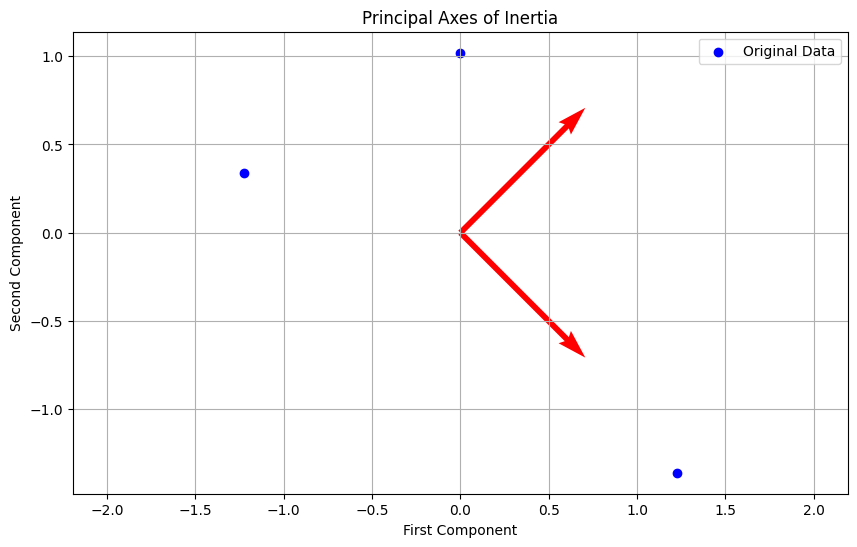

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initial data
A = np.array([[4, 5],
              [6, 7],
              [8, 0]])

# Center and standardize
A_centered = A - np.mean(A, axis=0)
A_standardized = A_centered / np.std(A_centered, axis=0)

# Correlation matrix
corr_matrix = np.corrcoef(A_standardized, rowvar=False)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# Sort by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Project data onto new axes
new_coords = np.dot(A_standardized, eigenvectors)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(A_standardized[:, 0], A_standardized[:, 1], color='blue', label='Original Data')

# Plot principal axes
for i in range(2):
    plt.quiver(0, 0, eigenvectors[0, i], eigenvectors[1, i], 
              angles='xy', scale_units='xy', scale=1, color='red')

plt.axis('equal')
plt.grid(True)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Principal Axes of Inertia')
plt.legend()

print('valeure propre')
print(eigenvalues)
print('vectors propre')
print(eigenvectors)
print("New coordinates in principal axes basis:")
print(new_coords)

In [3]:
import numpy as np

# Données initiales
A = np.array([[4, 5],
              [6, 7],
              [8, 0]])

# Matrice centrée réduite (Z)
Z = (A - np.mean(A, axis=0)) / np.std(A, axis=0)

# Calcul des composantes principales (C)
corr_matrix = np.corrcoef(Z, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
C = np.dot(Z, eigenvectors)

# Contributions des axes (% d'inertie)
inertie_axes = eigenvalues / np.sum(eigenvalues) * 100

# Contributions des individus (CTR)
n = Z.shape[0]  # nombre d'individus
ctr = np.zeros_like(C)
for j in range(C.shape[1]):
    ctr[:, j] = (C[:, j]**2) / (n * eigenvalues[j])

print("Inertie expliquée par axe (%):")
for i, inertie in enumerate(inertie_axes):
    print(f"Axe {i+1}: {inertie:.2f}%")

print("\nContributions des individus (CTR):")
for i in range(n):
    print(f"Individu {i+1}: {ctr[i]}")

Inertie expliquée par axe (%):
Axe 1: 84.67%
Axe 2: 15.33%

Contributions des individus (CTR):
Individu 1: [0.2408833  0.42578337]
Individu 2: [0.10220825 0.56445842]
Individu 3: [0.65690845 0.00975822]
